<a href="https://colab.research.google.com/github/erikfelipe/Copa_do_mundo_EDA/blob/main/CopaDoMundo_Partidas_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Copa do Mundo FIFA

## Dataset

Este conjunto de dados contêm 4.572 partidas da Copa do Mundo da FIFA disputadas em diferentes anos e locais. Cada linha representa uma partida individual com detalhes sobre equipes, gols, estádio, árbitros e público. É útil para análises esportivas, análise de desempenho, detecção de tendências e visualização. Os dados abrangem torneios históricos da Copa do Mundo com granularidade em nível de partida.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importação dos dados

In [4]:
df = pd.read_csv('./WorldCupMatches.csv')

## Exploração inicial



In [5]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [7]:
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [8]:
df.shape

(4572, 20)

In [9]:
df.isnull().sum()

,0
Year,3720
Datetime,3720
Stage,3720
Stadium,3720
City,3720
Home Team Name,3720
Home Team Goals,3720
Away Team Goals,3720
Away Team Name,3720
Win conditions,3720


In [10]:
df.duplicated().sum()

np.int64(3735)

## Limpeza e padronização dos dados


In [11]:
# Limpar todas as linhas onde todos os valores são nulos
df = df.dropna(how='all')

#Limpar todos os valores duplicados
df = df.drop_duplicates()

In [12]:
#Tranformar Ano no formato INT
df['Year'] = df['Year'].astype(int)
#Ajustar formato Datetime
df['Datetime'] = pd.to_datetime(
    df['Datetime'].astype(str).str.strip(),
    format='mixed',
    dayfirst=True
)

In [13]:
#Retirar caracteres errados de alguns nomes de times
df['Home Team Name'] = (
    df['Home Team Name']
    .astype(str)
    .str.replace(r'.*?>', '', regex=True)
    .str.strip()
)

df['Away Team Name'] = (
    df['Away Team Name']
    .astype(str)
    .str.replace(r'.*?>', '', regex=True)
    .str.strip()
)

#padronização de nomes de times (Levando em conta contextos históricos)
replace_dict = {
    "C te d'Ivoire": "Ivory Coast",
    "Germany FR": "Germany",
    "China PR": "China",
    "IR Iran": "Iran"
}

for col in ['Home Team Name', 'Away Team Name']:
    df[col] = df[col].replace(replace_dict)

## Criação de métricas

In [14]:
#Quantidades de partidas por time
home_matches = df['Home Team Name'].value_counts()
away_matches = df['Away Team Name'].value_counts()
total_matches = home_matches.add(away_matches, fill_value=0).sort_values(ascending=False)

#Quantidade de gols por time
home_goals = df.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = df.groupby('Away Team Name')['Away Team Goals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

## Análise exploratória - Em andamento

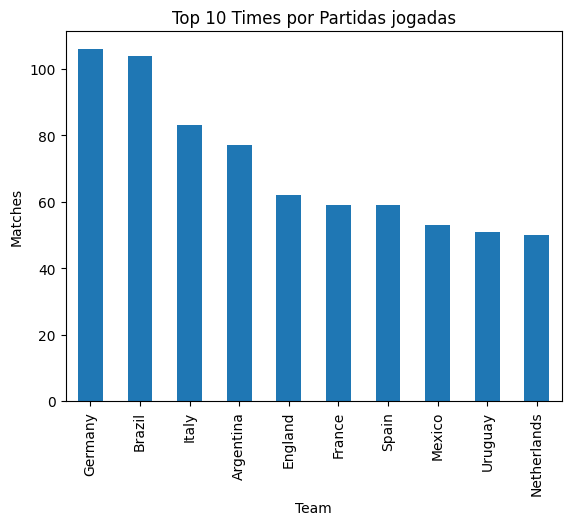

In [15]:
total_matches.head(10).plot(kind='bar')
plt.title("Top 10 Times por Partidas jogadas")
plt.xlabel("Team")
plt.ylabel("Matches")
plt.show()

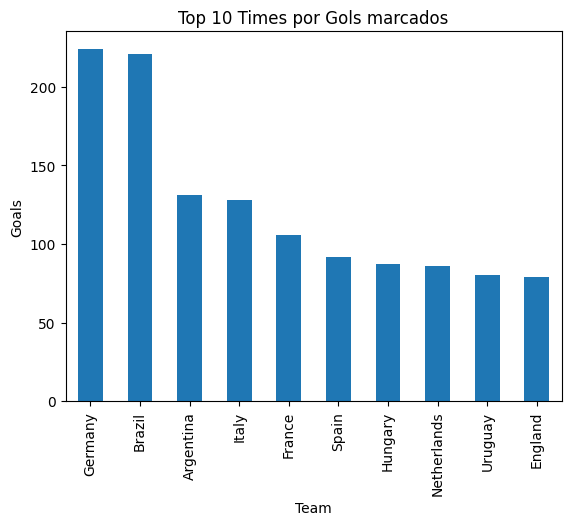

In [16]:
total_goals.head(10).plot(kind='bar')
plt.title("Top 10 Times por Gols marcados")
plt.xlabel("Team")
plt.ylabel("Goals")
plt.show()